# (Ford GoBike System Data Exploration)
## by (Anwar Alshoumer)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system from Ford GoBike system. It contains features related to three main aspects: bike and rides, customers and stations. The data collected for one month in Feb 2019.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#load data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
#view first 5 records of the data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
44696,327,2019-02-22 14:07:09.9140,2019-02-22 14:12:37.5040,182.0,19th Street BART Station,37.809013,-122.268247,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,5599,Subscriber,1987.0,Male,No
145745,270,2019-02-07 09:21:27.5890,2019-02-07 09:25:58.0020,245.0,Downtown Berkeley BART,37.870139,-122.268422,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,5121,Subscriber,1984.0,Male,No
3911,419,2019-02-28 16:47:09.8430,2019-02-28 16:54:09.8310,119.0,18th St at Noe St,37.761047,-122.432642,75.0,Market St at Franklin St,37.773793,-122.421239,5525,Subscriber,1977.0,Male,No
80826,413,2019-02-18 14:46:25.4190,2019-02-18 14:53:19.1590,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,262.0,West St at University Ave,37.869967,-122.286533,6466,Subscriber,1992.0,Male,No
143627,585,2019-02-07 14:47:11.8760,2019-02-07 14:56:57.5140,81.0,Berry St at 4th St,37.775880,-122.393170,22.0,Howard St at Beale St,37.789756,-122.394643,5037,Subscriber,1983.0,Male,No
3444,217,2019-02-28 17:19:12.2450,2019-02-28 17:22:49.5370,9.0,Broadway at Battery St,37.798572,-122.400869,16.0,Steuart St at Market St,37.794130,-122.394430,5583,Subscriber,1988.0,Male,No
35594,549,2019-02-23 18:09:26.8410,2019-02-23 18:18:36.7150,26.0,1st St at Folsom St,37.787290,-122.394380,349.0,Howard St at Mary St,37.781010,-122.405666,6094,Subscriber,1995.0,Male,No
69185,855,2019-02-19 19:55:18.1230,2019-02-19 20:09:33.4130,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4936,Subscriber,1987.0,Male,No
22867,170,2019-02-26 05:46:08.6760,2019-02-26 05:48:58.6960,181.0,Grand Ave at Webster St,37.811377,-122.265192,337.0,Webster St at 19th St,37.806970,-122.266588,4573,Subscriber,1987.0,Female,No
35878,2129,2019-02-23 17:03:36.3490,2019-02-23 17:39:06.0600,76.0,McCoppin St at Valencia St,37.771662,-122.422423,323.0,Broadway at Kearny,37.798014,-122.405950,5496,Subscriber,NaN,NaN,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> The dataset is constructed of 183412 rows and 16 columns which are: 

<li>duration_sec: with integer datatype </li> 
<li>start_time: with object datatype</li> 
<li> end_time: with object datatype</li> 
<li>start_station_id: with float datatype</li> 
<li>start_station_name: with object datatype</li> 
<li>start_station_latitude: with float datatype</li> 
<li>start_station_longitude: with float datatype</li> 
<li>end_station_id: with float datatype</li> 
<li>end_station_name: with object datatype</li> 
<li>end_station_latitude: with float datatype</li> 
<li>end_station_longitude: with float datatype</li> 
<li>bike_id: with integer datatype</li> 
<li>user_type: with object datatype</li> 
<li>member_birth_year: with float datatype</li> 
<li>member_gender: with object datatype</li> 
<li>bike_share_for_all_trip: with object datatype</li> 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the features that affecting the count of bikes riding such as duration, start_time, user_type, member_birth_year and member_gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Feature that may help me invitigate and generate valuable insights is duration of a ride.

### Initial cleaning
> In this section I will apply initial cleaning, including changinig datatypes and handling missing and duplicated data.

In [6]:
#check No. of missing values in the data frame
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#drop null values
df.dropna(inplace=True)

In [8]:
#Test if null values are removed
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
#check for duplicated values
sum(df.duplicated())

0

In [10]:
#Make a copy of df
ford_df = df.copy()

In [11]:
#change datatype of start_time & end_time 
ford_df['start_time'] = pd.to_datetime(ford_df['start_time'])
ford_df['end_time'] = pd.to_datetime(ford_df['end_time'])

# change member_birth_year datatype from float to integer
ford_df['member_birth_year'] = ford_df['member_birth_year'].astype(int)

#change datatype of user_type & member_gender to category
ford_df['user_type'] = ford_df['user_type'].astype('category')
ford_df['member_gender'] = ford_df['member_gender'].astype('category')

In [12]:
# conver duration in secon to duration in minutes for readability
ford_df['duration_min'] = ford_df.duration_sec/60

In [13]:
# calculate member age from member_birth_year col
ford_df['member_age'] = 2019 - ford_df.member_birth_year

In [14]:
#check new cols and datatypes
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [15]:
# extract hour and day from start_time
ford_df['start_hour'] = ford_df.start_time.dt.strftime('%H')
ford_df['start_day'] = ford_df.start_time.dt.strftime('%A')
ford_df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_hour,start_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75,35,17,Thursday


In [16]:
# drop unwanted cols
ford_df.drop(['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace = True)
ford_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip', 'duration_min',
       'member_age', 'start_hour', 'start_day'],
      dtype='object')

In [17]:
#save df to csv file for later usage
ford_df.to_csv('FordGoBike.csv', index=False)

## Univariate Exploration


In [18]:
ford_df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

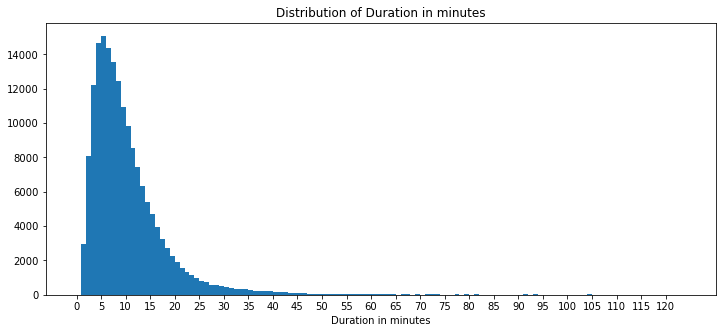

In [19]:
# distribution of durations in min
fig, ax = plt.subplots(figsize=(12,5))
bins = np.arange(0, 125, 1)
ticks = np.arange(0, 125, 5)
plt.hist(data = ford_df, x = 'duration_min', bins = bins);
plt.xticks(ticks, ticks);
plt.xlabel('Duration in minutes');
ax.set_title('Distribution of Duration in minutes');

We can notice that most of the rides duration were 65 minutes or less after that it starts getting less and less count. So for analysis quality, I will consider ride durations that are above 65 as outliers and remove them.

In [20]:
#number of records with duration greater than 65 mins
ford_df[ford_df.duration_min > 65].count()

duration_sec               1234
start_time                 1234
end_time                   1234
start_station_name         1234
end_station_name           1234
bike_id                    1234
user_type                  1234
member_birth_year          1234
member_gender              1234
bike_share_for_all_trip    1234
duration_min               1234
member_age                 1234
start_hour                 1234
start_day                  1234
dtype: int64

In [21]:
# remove 'duration_min' outliers
out = ford_df.index[ford_df['duration_min'] > 65].tolist()
ford_df.drop(axis=0,index = out, inplace=True)

In [22]:
# Test if outliers were removed
ford_df[ford_df.duration_min > 65].count()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
member_age                 0
start_hour                 0
start_day                  0
dtype: int64

In [23]:
ford_df.member_age.describe()

count    173718.000000
mean         34.192300
std          10.117273
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

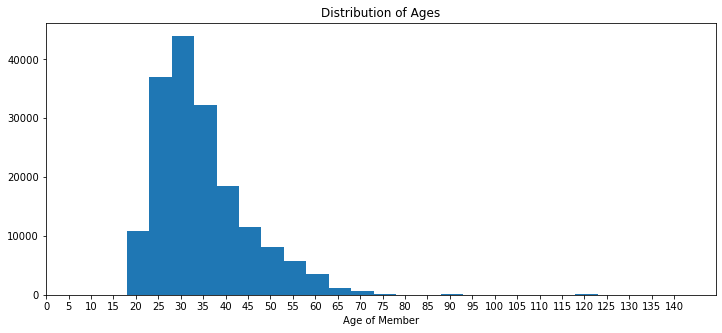

In [24]:
#distribution of member_age 
fig, ax = plt.subplots(figsize=(12,5))
bins = np.arange(18, 145, 5)
ticks = np.arange(0, 145, 5)
plt.hist(data = ford_df, x = 'member_age', bins = bins);
plt.xticks(ticks, ticks)
plt.xlabel('Age of Member');
ax.set_title('Distribution of Ages');

In the distribution of age, I noticed some outliers in age values that are above 100 and 120. So, all values that are greater than 100 will be removed.

In [25]:
#number of records with duration greater than 65 mins
ford_df[ford_df.member_age > 100].count()

duration_sec               72
start_time                 72
end_time                   72
start_station_name         72
end_station_name           72
bike_id                    72
user_type                  72
member_birth_year          72
member_gender              72
bike_share_for_all_trip    72
duration_min               72
member_age                 72
start_hour                 72
start_day                  72
dtype: int64

In [26]:
# remove 'member_age' outliers
out1 = ford_df.index[ford_df['member_age'] > 100].tolist()
ford_df.drop(axis=0,index = out1, inplace=True)

In [27]:
# test if outliers were removed from 'member_age'
ford_df[ford_df.member_age > 100].count()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
member_age                 0
start_hour                 0
start_day                  0
dtype: int64

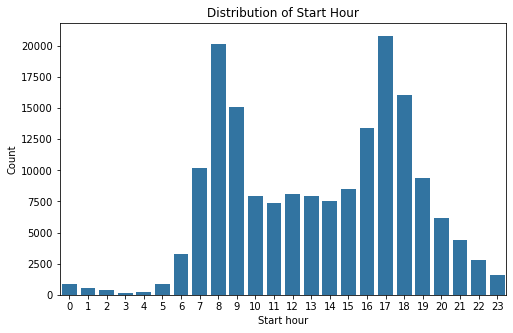

In [28]:
# distribution of start_hour
#change type of start_hour to int to sort the values in x-axis
ford_df['start_hour'] = ford_df['start_hour'].astype(int)
color = sb.color_palette()[0]
plt.figure(figsize=(8, 5))
bins = np.arange(0, 24, 1)
sb.countplot(data=ford_df, x='start_hour', color=color, order= bins);
plt.xlabel('Start hour')
plt.ylabel('Count')
plt.title('Distribution of Start Hour');
plt.show()

According to plot above, the rush hour in the day for riding a bike is 8 am and in the evening it is 5 pm.

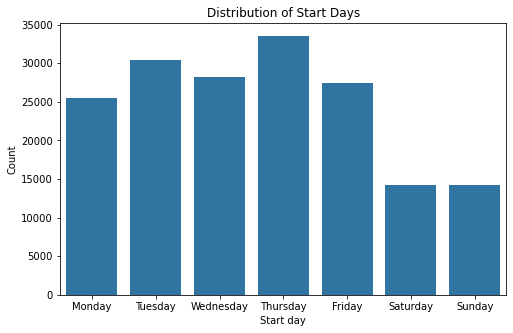

In [29]:
# distribution of days
plt.figure(figsize=(8, 5))
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data= ford_df, x='start_day', color= color, order = weekdays);
plt.xlabel('Start day')
plt.ylabel('Count')
plt.title('Distribution of Start Days');

For the day distribution, Thursday appears to be the favorite day for riders follwed by Tuesday then Friday.

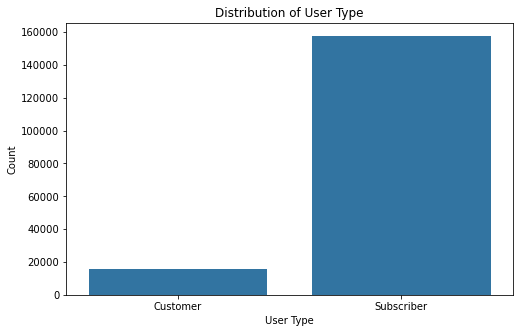

In [30]:
# distribution of user type
plt.figure(figsize=(8, 5))
sb.countplot(data=ford_df, x='user_type', color=color);
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Type');

The above plot shows that the number of subscribers is much more than number of customers.

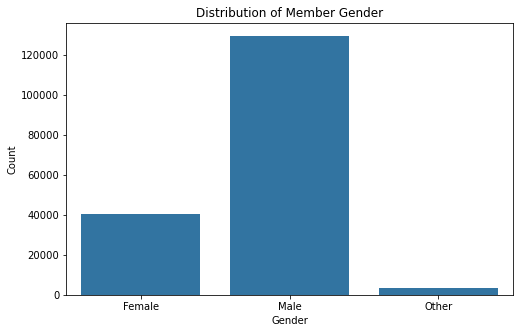

In [31]:
# distribution of member gender
plt.figure(figsize=(8, 5))
sb.countplot(data=ford_df, x='member_gender', color=color);
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Member Gender');

From the previous chart we can clearly say that male riders are outnumber the female riders.

In [32]:
#save the df to csv file for later usage
ford_df.to_csv('Ford_GoBike.csv', index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of a ride distribution is varied from 1 to 1409 which tells that we have outliers. After taking a look on the distribution chart I found that most of the rides last for 65 minutes and any value greater than 65 considered as outlier and removed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Member age feature invistigated and found that there are more than 70 values greater than 100, which later removed as outliers. After that I invistigated start hour, day, gender, and user type all of these columns was clean except for data types which was changed at first in the wrangling phase.

## Bivariate Exploration


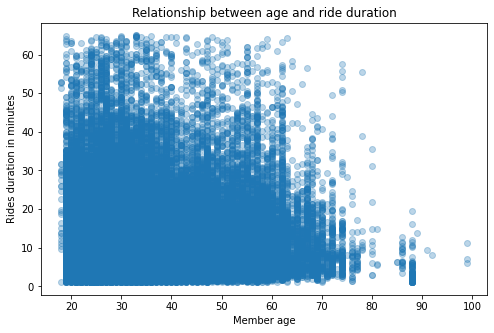

In [33]:
# explore relationship between member age and ride duration
plt.figure(figsize=(8, 5))
plt.scatter(data= ford_df, x= 'member_age', y= 'duration_min' , alpha= 0.3);
plt.title('Relationship between age and ride duration')
plt.xlabel('Member age');
plt.ylabel('Rides duration in minutes');

The previous plot shows a negative correlation between age and duration.

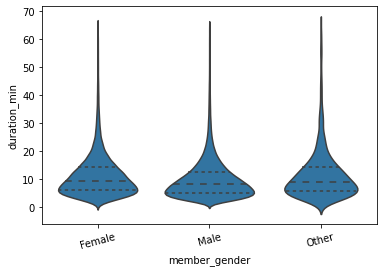

In [34]:
#explore relationship between member gender and duration
sb.violinplot(data= ford_df, x= 'member_gender', y= 'duration_min', color= color, inner = 'quartile');
plt.xticks(rotation = 15);

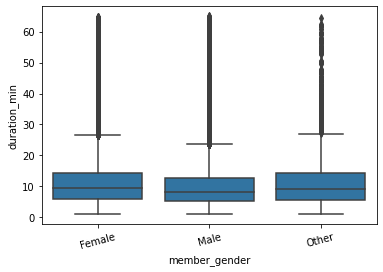

In [35]:
#explore relationship between member gender and duration (box plot)
sb.boxplot(data= ford_df, x= 'member_gender', y= 'duration_min', color= color)
plt.xticks(rotation=15);

From above chart we can see that male riders spend less time riding comparing to female and other.

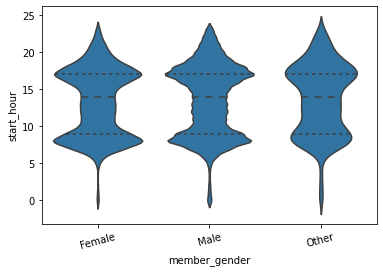

In [36]:
#explore relationship between member gender and start hour
sb.violinplot(data= ford_df, x= 'member_gender', y= 'start_hour', color= color, inner = 'quartile');
plt.xticks(rotation = 15);

From previous plot, females appear to prefer morning riding compared to males and others.

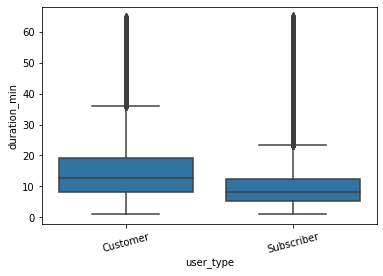

In [37]:
#relationship between duration and user type
sb.boxplot(data= ford_df, x= 'user_type', y= 'duration_min', color= color)
plt.xticks(rotation=15);

Customers duration appears to be longer than subscribers.

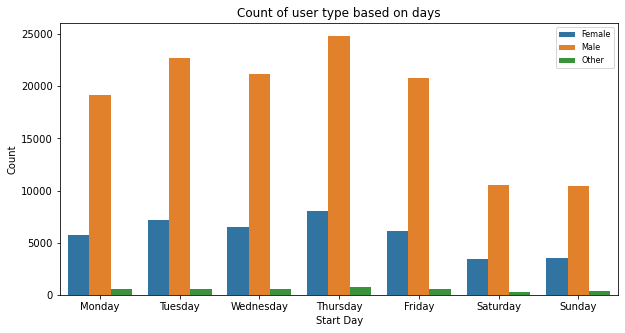

In [51]:
#explore relationship between member gender and start day
plt.figure(figsize=(10, 5))
sb.countplot(data= ford_df, x='start_day', hue='member_gender', order = weekdays);
plt.title('Count of user type based on days')
plt.xlabel('Start Day')
plt.ylabel('Count');
plt.legend(loc='upper right', prop={'size': 8});

There is no much difference in start day between genders.

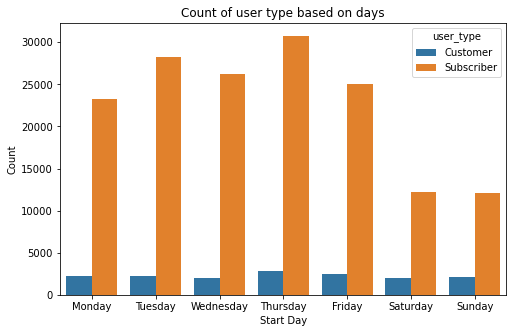

In [50]:
#explore relationship between user type and start day
plt.figure(figsize=(8, 5))
sb.countplot(data= ford_df, x='start_day', hue='user_type', order = weekdays);
plt.title('Count of user type based on days')
plt.xlabel('Start Day')
plt.ylabel('Count');

Thursday seems the preferred day for both customers and subscribers.

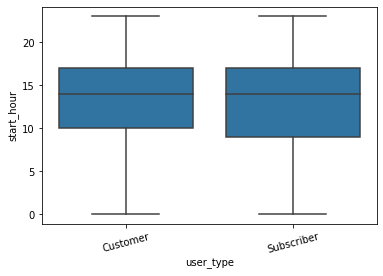

In [40]:
#explore relationship between user type and start hour
sb.boxplot(data= ford_df, x= 'user_type', y= 'start_hour', color= color)
plt.xticks(rotation=15);

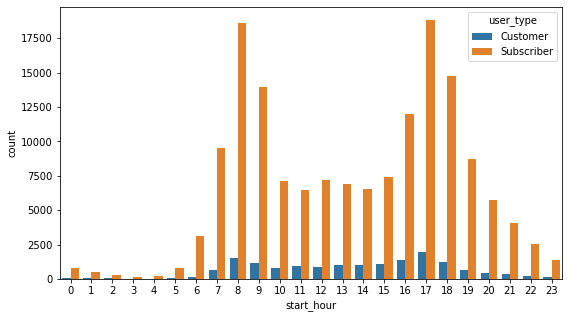

In [41]:
plt.figure(figsize=(9, 5))
sb.countplot(data= ford_df, x='start_hour', hue='user_type');

There is no much difference in start hour between user types.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> male riders have less duration, female prefer morning riding compared to other genders, and customers have longer duration than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the age has negative correlation with the duration and females duration is longer than other.

## Multivariate Exploration


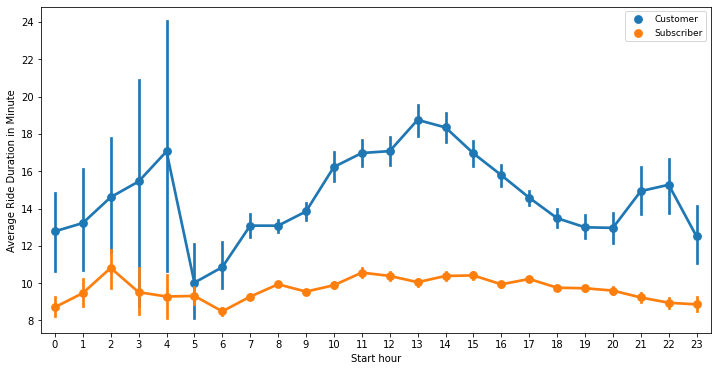

In [42]:
#check relationship between duration and start hour based on user type
plt.figure(figsize=(12, 6))
sb.pointplot(data = ford_df, x = 'start_hour', y = 'duration_min', hue='user_type')
plt.xlabel('Start hour');
plt.ylabel('Average Ride Duration in Minute')
plt.legend(loc='upper right', prop={'size': 9});

Customers tend to have long ride duration compared to subscribers. And they seem to prefer afternoon riding while subscribers are mostly riding after midnight.

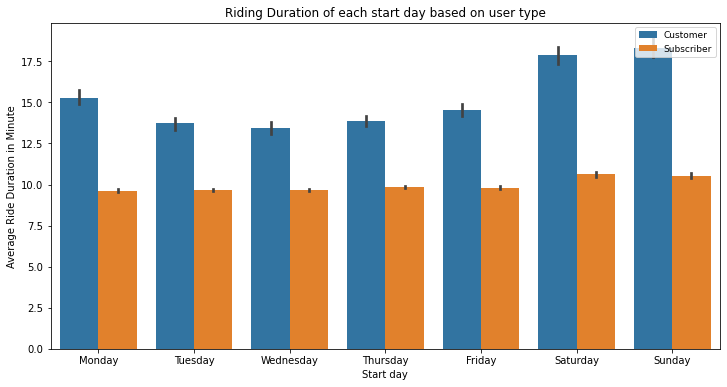

In [49]:
#check relationship between duration and start day based on user type
plt.figure(figsize=(12, 6))
sb.barplot(data = ford_df, x = 'start_day', y = 'duration_min', hue='user_type', order = weekdays)
plt.xlabel('Start day');
plt.ylabel('Average Ride Duration in Minute')
plt.title("Riding Duration of each start day based on user type");
plt.legend(loc='upper right', prop={'size': 9});

Customers have longer duration specially on Sunday, for subscribers, there is no much difference between days of the week.

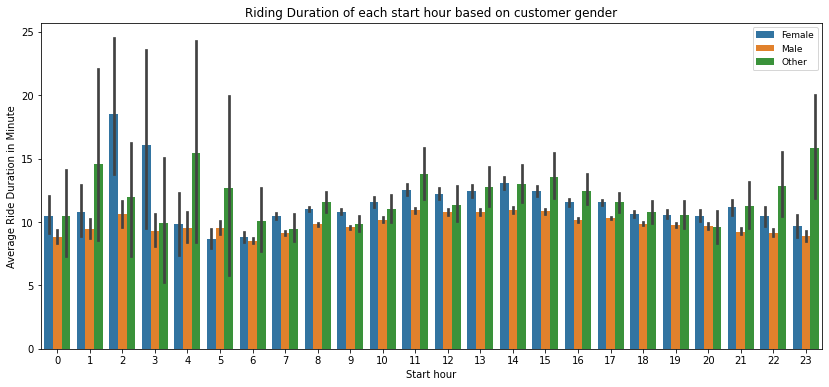

In [48]:
#check relationship between duration and start hour based on gender
plt.figure(figsize=(14, 6))
sb.barplot(data = ford_df, x = 'start_hour', y = 'duration_min', hue='member_gender')
plt.xlabel('Start hour');
plt.ylabel('Average Ride Duration in Minute')
plt.title("Riding Duration of each start hour based on customer gender");
plt.legend(loc='upper right', prop={'size': 9});

males have shorter duration compared to others. The preferred start hour is varied between genders, the female have longest duration specially from 2 to 3 am.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is no significant relationships between features except for some observations.

### Were there any interesting or surprising interactions between features?

> Customers have longer durations in all cases. Preferred day and start hour are different between these two groups. Surprisingly, Female spend long time riding at late night.